# Actividad Final MIA07


Juan Carlos Muñoz Esquivel
y los demás

Extracción de datos de un periodico

In [7]:
import numpy as np
import pandas as pd

import newspaper

from newspaper import Article

import socket

In [8]:
temp=pd.DataFrame()
df=pd.DataFrame()
newlist = []
print(temp,df,newlist)


Empty DataFrame
Columns: []
Index: [] Empty DataFrame
Columns: []
Index: [] []


In [9]:
def is_connected():
    try:
        # connect to the host -- tells us if the host is actually
        # reachable
        socket.create_connection(('https://www.bostonglobe.com/', 80))
        return True
    except OSError:
        pass
    return False
print(is_connected())

False


In [11]:
#create a nespaper object
page = newspaper.build('https://english.elpais.com/')
#page = newspaper.build('/bbc.co.uk')

for article in page.articles:
    print(article.url)
    newlist.append(article.url)
    

https://english.elpais.com/international/2024-04-14/israel-hails-success-in-blocking-irans-unprecedented-attack-biden-now-seeks-diplomatic-response.html
https://english.elpais.com/international/2024-04-14/the-shadow-war-between-iran-and-israel-has-been-exposed-what-happens-next.html
https://english.elpais.com/international/2024-04-14/irans-powerful-missile-and-drone-arsenal.html
https://english.elpais.com/international/2024-04-14/iran-chronicle-of-an-attack-foretold.html
https://english.elpais.com/opinion/2024-04-14/explosive-scenario-in-the-middle-east.html
https://english.elpais.com/culture/2024-04-14/sublime-and-no-doubt-submerge-coachella-in-1990s-nostalgia.html
https://english.elpais.com/culture/2024-04-13/shakira-surprises-crowds-at-coachella-with-announcement-of-new-world-tour.html
https://english.elpais.com/health/2024-04-14/toward-insulin-free-type-1-diabetes-new-treatments-that-may-slow-down-the-disease.html
https://english.elpais.com/international/2024-04-14/chiapas-captive-

In [12]:
length_list=len(newlist)
length_list

132

In [13]:
print(newlist)

['https://english.elpais.com/international/2024-04-14/israel-hails-success-in-blocking-irans-unprecedented-attack-biden-now-seeks-diplomatic-response.html', 'https://english.elpais.com/international/2024-04-14/the-shadow-war-between-iran-and-israel-has-been-exposed-what-happens-next.html', 'https://english.elpais.com/international/2024-04-14/irans-powerful-missile-and-drone-arsenal.html', 'https://english.elpais.com/international/2024-04-14/iran-chronicle-of-an-attack-foretold.html', 'https://english.elpais.com/opinion/2024-04-14/explosive-scenario-in-the-middle-east.html', 'https://english.elpais.com/culture/2024-04-14/sublime-and-no-doubt-submerge-coachella-in-1990s-nostalgia.html', 'https://english.elpais.com/culture/2024-04-13/shakira-surprises-crowds-at-coachella-with-announcement-of-new-world-tour.html', 'https://english.elpais.com/health/2024-04-14/toward-insulin-free-type-1-diabetes-new-treatments-that-may-slow-down-the-disease.html', 'https://english.elpais.com/international/2

In [14]:
url=newlist[0]
    
type(url)

str

In [15]:
for i in newlist:
    #print(i)
    url=i
    print(url)
    my_article = Article(url, language="en")
    my_article.download()
    #print(my_article.html)
    my_article.parse()
    
    nested_list=[[my_article.title,my_article.authors,my_article.publish_date,my_article.text]]
    temp=pd.DataFrame(nested_list,columns=['Title','Authors','Publishing Date','Text'])
    df = pd.concat([df, temp])

df.describe()


https://english.elpais.com/international/2024-04-14/israel-hails-success-in-blocking-irans-unprecedented-attack-biden-now-seeks-diplomatic-response.html
https://english.elpais.com/international/2024-04-14/the-shadow-war-between-iran-and-israel-has-been-exposed-what-happens-next.html
https://english.elpais.com/international/2024-04-14/irans-powerful-missile-and-drone-arsenal.html
https://english.elpais.com/international/2024-04-14/iran-chronicle-of-an-attack-foretold.html
https://english.elpais.com/opinion/2024-04-14/explosive-scenario-in-the-middle-east.html
https://english.elpais.com/culture/2024-04-14/sublime-and-no-doubt-submerge-coachella-in-1990s-nostalgia.html
https://english.elpais.com/culture/2024-04-13/shakira-surprises-crowds-at-coachella-with-announcement-of-new-world-tour.html
https://english.elpais.com/health/2024-04-14/toward-insulin-free-type-1-diabetes-new-treatments-that-may-slow-down-the-disease.html
https://english.elpais.com/international/2024-04-14/chiapas-captive-

Title Authors  \
count                                                 132     132   
unique                                                121     101   
top     Carolina Marín se proclama campeona de Europa ...      []   
freq                                                    2      10   

            Publishing Date Text  
count                   132  132  
unique                   13   97  
top     2024-04-14 00:00:00       
freq                     72   29

In [16]:
df.head()

Title  \
0  Israel says it intercepted with its allies 99%...   
0  The shadow war between Iran and Israel has bee...   
0          Iran’s powerful missile and drone arsenal   
0              Iran: Chronicle of an attack foretold   
0              Explosive scenario in the Middle East   

                                           Authors      Publishing Date  \
0                                   [Antonio Pita]  2024-04-14 00:00:00   
0                                               []  2024-04-14 00:00:00   
0  [Trinidad Deiros Bronte, Special Correspondent]  2024-04-14 00:00:00   
0                               [Ángeles Espinosa]  2024-04-14 00:00:00   
0                                        [El País]  2024-04-14 00:00:00   

                                                Text  
0  Israel woke up on Sunday with a sense of eupho...  
0  A cleric chants slogans during an anti-Israeli...  
0  Iran has one of the largest missile arsenals i...  
0  Educational exposure of ideas, assumptions or ...  
0  Iran’s feared military retaliation against Isr...

In [17]:
df.drop_duplicates(subset=['Text'], keep='last', inplace=True)
df.head()

Title  \
0  Israel says it intercepted with its allies 99%...   
0  The shadow war between Iran and Israel has bee...   
0          Iran’s powerful missile and drone arsenal   
0              Iran: Chronicle of an attack foretold   
0              Explosive scenario in the Middle East   

                                           Authors      Publishing Date  \
0                                   [Antonio Pita]  2024-04-14 00:00:00   
0                                               []  2024-04-14 00:00:00   
0  [Trinidad Deiros Bronte, Special Correspondent]  2024-04-14 00:00:00   
0                               [Ángeles Espinosa]  2024-04-14 00:00:00   
0                                        [El País]  2024-04-14 00:00:00   

                                                Text  
0  Israel woke up on Sunday with a sense of eupho...  
0  A cleric chants slogans during an anti-Israeli...  
0  Iran has one of the largest missile arsenals i...  
0  Educational exposure of ideas, assumptions or ...  
0  Iran’s feared military retaliation against Isr...

In [18]:
df.describe()

Title Authors  \
count                                                  97      97   
unique                                                 97      85   
top     Israel says it intercepted with its allies 99%...      []   
freq                                                    1       8   

            Publishing Date                                               Text  
count                    97                                                 97  
unique                   12                                                 97  
top     2024-04-14 00:00:00  Israel woke up on Sunday with a sense of eupho...  
freq                     51                                                  1

In [19]:
text_list = df["Text"].tolist()

print(text_list)

["Israel woke up on Sunday with a sense of euphoria after having intercepted — with the help of the United States, the United Kingdom and neighboring Jordan — 99% of the more than 300 drones and cruise and ballistic missiles launched by Iran on Saturday night, in an unprecedented attack that has plunged the Middle East into uncharted territory.\n\nThe attack was the predicted retaliation for Israel’s assassination of seven Iranian military commanders in a bombing of a consular building in Damascus two weeks ago. It marked the first time Iran had attacked Israeli territory after years of covert warfare. Iran’s allies in Lebanon, Yemen and Iraq also launched projectiles, Israel’s Defense Forces (IDF) spokesperson Daniel Hagari said earlier in the day. Israel does not officially consider the conflict over, but it has reopened its airspace — which it closed before midnight — and the fighter-bombers that shot down dozens of missiles outside Israeli territory are returning to base.\n\nThe at

In [20]:
len(text_list)

97

In [21]:
import nltk
import unicodedata
import string
import re

In [22]:
def remove_accents(token):
    
    return "".join(x for x in unicodedata.normalize("NFKD", token) if x in string.ascii_letters or x == " ")

nltk.download("stopwords")

nltk.download("punkt")

nltk.download("averaged_perceptron_tagger")

nltk.download("wordnet")

stopwords  = nltk.corpus.stopwords.words("english")

stemmer    = nltk.stem.PorterStemmer()

lemmatizer = nltk.stem.WordNetLemmatizer()

RE_VALID = "[a-zA-Z]"
MINIMUM_STRING_LENGTH = 3

ALLOWED_PART_OF_SPEECH_TYPES = {"NN": "n", 
                                "JJ":"a", 
                                "VB":"v",
                                "RB":"r"}

PART_OF_SPEECH_TYPES_KEYS = list(ALLOWED_PART_OF_SPEECH_TYPES.keys())

tokens_list           = []

all_tokens_lists      = []

all_lemmatized_tokens = []

for index, text in enumerate(text_list):
    
    tokens = [word.lower() for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    list_sentence_tokens  = []
    non_lemmatized_tokens = []
    
    for token in tokens:
        
        result = remove_accents(token)
        
        result = str(result).translate(string.punctuation)
        
        list_sentence_tokens.append(result)
        
        non_lemmatized_tokens.append("-")
        
        if result not in stopwords:
            
            if re.search(RE_VALID, result):
                
                if len(result) >= MINIMUM_STRING_LENGTH:
                    
                    part_of_speech = nltk.pos_tag([result])[0][1][:2]
                    
                    default_part_of_speech = "n"
                    
                if part_of_speech in ALLOWED_PART_OF_SPEECH_TYPES:
                    
                    default_part_of_speech = ALLOWED_PART_OF_SPEECH_TYPES[part_of_speech]
                    
                stem = stemmer.stem(result)
                    
                lemmatization = lemmatizer.lemmatize(result, 
                                                     pos=default_part_of_speech)
                    
                if part_of_speech in PART_OF_SPEECH_TYPES_KEYS:
                    
                    tokens_list.append((result,
                                        stem,
                                        lemmatization,
                                        part_of_speech))
                    
                    non_lemmatized_tokens = non_lemmatized_tokens[:-1]
                    
                    non_lemmatized_tokens.append(lemmatization)
                    
    all_tokens_lists.append(list_sentence_tokens)
                    
    lemmatized_tokens_list = " ".join(non_lemmatized_tokens)
                    
    all_lemmatized_tokens.append(lemmatized_tokens_list)

dataframe_tokens = pd.DataFrame(all_tokens_lists)

print(dataframe_tokens)

print(dataframe_tokens.head().to_string())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jumunoz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


          0           1           2          3         4            5      \
0        israel        woke          up         on    sunday         with   
1             a      cleric      chants    slogans    during           an   
2          iran         has         one         of       the      largest   
3   educational    exposure          of      ideas            assumptions   
4          iran                       s     feared  military  retaliation   
..          ...         ...         ...        ...       ...          ...   
92      xochitl      galvez                               es        etico   
93           el       mundo       sigue    girando                tambien   
94          una     familia  venezolana  encerrada        en          una   
95           el  arqueologo        jose     huchim     lleva        media   
96         None        None        None       None      None         None   

          6           7       8         9      ... 13847 13848 13849 13850 

En contrar las palabras más lematizadas

In [23]:
for entry in dataframe_tokens:
    
    if str(dataframe_tokens[entry].dtype) in ("object", "string_", "unicode_"):
        
        dataframe_tokens[entry].fillna(value="", inplace=True)

print(dataframe_tokens.head().to_string())



         0         1       2        3         4            5            6           7      8         9         10      11           12       13    14       15     16         17        18        19         20       21     22        23        24         25           26         27    28      29             30         31     32      33      34      35       36       37      38       39         40             41        42         43         44     45           46          47       48      49         50             51      52        53        54       55       56      57           58     59         60         61        62    63            64    65       66         67           68      69        70      71          72             73         74      75        76        77          78         79          80        81       82       83        84        85        86        87         88       89      90      91     92           93        94         95      96         97        98        99       

In [24]:
dataframe_all_words = pd.DataFrame(tokens_list, columns=["token",
                                                         "stem",
                                                         "lemmatization",
                                                         "part_of_speech"])

print(dataframe_all_words.head().to_string())

      token      stem lemmatization part_of_speech
0    israel    israel        israel             NN
1      woke      woke          woke             NN
2    sunday    sunday        sunday             NN
3     sense      sens         sense             NN
4  euphoria  euphoria      euphoria             NN


In [25]:
dataframe_all_words["counts"] = dataframe_all_words.groupby(["lemmatization"])["lemmatization"].transform("count")

print(dataframe_all_words["counts"])



0          89
1           1
2          12
3          16
4           1
         ... 
114267     98
114268     64
114269    185
114270     62
114271     31
Name: counts, Length: 114272, dtype: int64


In [26]:
print(dataframe_all_words)



             token        stem lemmatization part_of_speech  counts
0           israel      israel        israel             NN      89
1             woke        woke          woke             NN       1
2           sunday      sunday        sunday             NN      12
3            sense        sens         sense             NN      16
4         euphoria    euphoria      euphoria             NN       1
...            ...         ...           ...            ...     ...
114267      seguir      seguir        seguir             NN      98
114268     leyendo     leyendo       leyendo             NN      64
114269          ya          ya            ya             NN     185
114270         soy         soy           soy             NN      62
114271  suscriptor  suscriptor    suscriptor             NN      31

[114272 rows x 5 columns]


In [27]:
dataframe_all_words = dataframe_all_words.sort_values(by=["counts", 
                                                          "lemmatization"], 
                                        ascending=[False, True]).reset_index()

print(dataframe_all_words.head().to_string())


   index token stem lemmatization part_of_speech  counts
0   2834    de   de            de             NN    5726
1   3191    de   de            de             NN    5726
2   4236    de   de            de             NN    5726
3   6277    de   de            de             NN    5726
4   6536    de   de            de             NN    5726


In [28]:
dataframe_grouped = dataframe_all_words.groupby("lemmatization").first().sort_values(by="counts",
                                                                 ascending=False).reset_index()

print(dataframe_grouped.to_string())

                lemmatization   index                   token                    stem part_of_speech  counts
0                          de    2834                      de                      de             NN    5726
1                          la    2740                     las                      la             NN    4519
2                         que   15916                     que                     que             NN    3300
3                          el     730                      el                      el             NN    2930
4                          en    3923                      en                      en             NN    2840
5                         los    2233                     los                      lo             NN    1393
6                          un    1134                      un                      un             NN    1278
7                         una   25890                     una                     una             NN    1092
8                  

Construye grupos de Datos por parte de Discursos

In [30]:
dataframe_grouped = dataframe_grouped[["lemmatization", "part_of_speech", "counts"]]

for part_of_speech_type in PART_OF_SPEECH_TYPES_KEYS: 
    
    dataframe_part_of_speech = dataframe_grouped[dataframe_grouped["part_of_speech"] == part_of_speech_type]
    
    print(dataframe_part_of_speech.to_string())

                lemmatization part_of_speech  counts
0                          de             NN    5726
1                          la             NN    4519
2                         que             NN    3300
3                          el             NN    2930
4                          en             NN    2840
5                         los             NN    1393
6                          un             NN    1278
7                         una             NN    1092
8                          se             NN    1063
9                         con             NN     930
10                          e             NN     850
11                        del             NN     841
12                        por             NN     835
13                       para             NN     778
14                         su             NN     733
15                         lo             NN     587
16                       como             NN     555
18                         ma             NN  

Graficas

In [31]:
flattened_tokens_lists = [y for x in all_tokens_lists for y in x]

print(flattened_tokens_lists)



['israel', 'woke', 'up', 'on', 'sunday', 'with', 'a', 'sense', 'of', 'euphoria', 'after', 'having', 'intercepted', '', 'with', 'the', 'help', 'of', 'the', 'united', 'states', '', 'the', 'united', 'kingdom', 'and', 'neighboring', 'jordan', '', '', '', 'of', 'the', 'more', 'than', '', 'drones', 'and', 'cruise', 'and', 'ballistic', 'missiles', 'launched', 'by', 'iran', 'on', 'saturday', 'night', '', 'in', 'an', 'unprecedented', 'attack', 'that', 'has', 'plunged', 'the', 'middle', 'east', 'into', 'uncharted', 'territory', '', 'the', 'attack', 'was', 'the', 'predicted', 'retaliation', 'for', 'israel', '', 's', 'assassination', 'of', 'seven', 'iranian', 'military', 'commanders', 'in', 'a', 'bombing', 'of', 'a', 'consular', 'building', 'in', 'damascus', 'two', 'weeks', 'ago', '', 'it', 'marked', 'the', 'first', 'time', 'iran', 'had', 'attacked', 'israeli', 'territory', 'after', 'years', 'of', 'covert', 'warfare', '', 'iran', '', 's', 'allies', 'in', 'lebanon', '', 'yemen', 'and', 'iraq', 'als

In [32]:
token_frequency = nltk.FreqDist(flattened_tokens_lists)

print(token_frequency)

<FreqDist with 21932 samples and 169802 outcomes>


In [33]:
del token_frequency[""]

print(token_frequency)

<FreqDist with 21931 samples and 145762 outcomes>


In [34]:
sorted_token_frequency = sorted(token_frequency.items(),
                                key=lambda x: x[1],
                                reverse=True)

print(sorted_token_frequency)

[('de', 5726), ('la', 3580), ('the', 3392), ('a', 3390), ('que', 3300), ('el', 2931), ('en', 2840), ('y', 2406), ('of', 1522), ('los', 1393), ('to', 1293), ('and', 1284), ('un', 1278), ('in', 1219), ('no', 1119), ('una', 1092), ('se', 1063), ('las', 940), ('con', 930), ('del', 841), ('por', 835), ('that', 819), ('es', 816), ('para', 777), ('su', 733), ('is', 606), ('lo', 587), ('como', 555), ('al', 515), ('it', 496), ('mas', 494), ('s', 488), ('for', 471), ('with', 419), ('on', 401), ('pero', 400), ('he', 395), ('was', 367), ('ha', 363), ('me', 329), ('esta', 326), ('o', 316), ('are', 302), ('we', 300), ('his', 294), ('si', 265), ('from', 263), ('le', 263), ('has', 260), ('have', 250), ('sus', 250), ('as', 246), ('they', 235), ('by', 230), ('but', 224), ('who', 223), ('this', 223), ('anos', 222), ('not', 212), ('at', 211), ('fue', 208), ('i', 201), ('este', 201), ('todo', 198), ('sin', 196), ('tambien', 194), ('an', 190), ('which', 187), ('cuando', 186), ('there', 185), ('ya', 185), ('

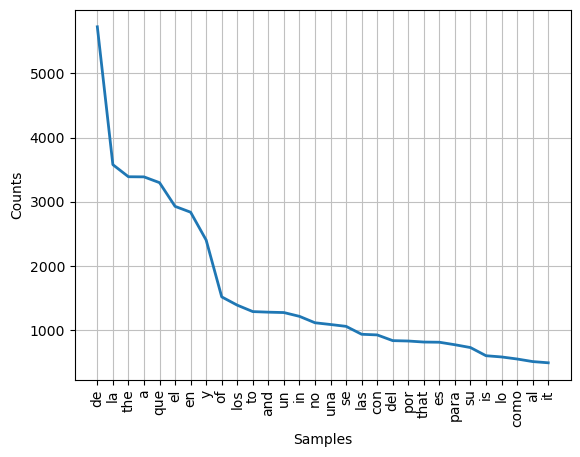

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
token_frequency.plot(30, cumulative=False)

In [36]:
lemmatized_words = dataframe_all_words["lemmatization"].tolist()

lemmatized_frequency = nltk.FreqDist(lemmatized_words)

sorted(lemmatized_frequency.items(),
       key=lambda x: x[1],
       reverse=True)

print(lemmatized_frequency)

<FreqDist with 20019 samples and 114272 outcomes>


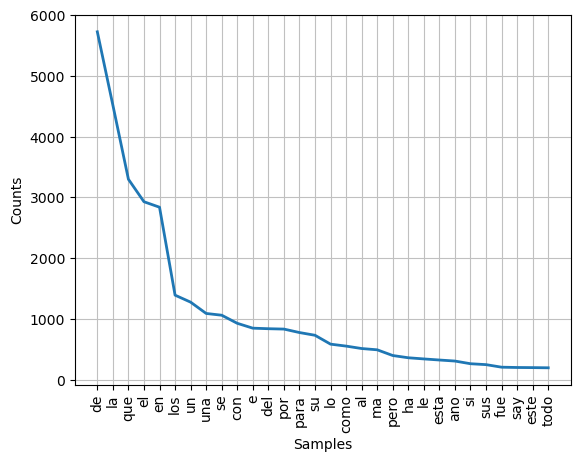

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
lemmatized_frequency.plot(30, cumulative=False)

Clasificación Vectorial 1

Clasificación Vectorial 2